In [2]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [5]:
series = read_csv('./daily-min-temperatures.csv', header=0, index_col=0)

In [57]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
# The optimal lag is selectd from training process
window = model_fit.k_ar
coef = model_fit.params
# History is the last lag observations
history = train[len(train)-window:]
# convert from ndarray to list
history = [history[i] for i in range(len(history))]
predictions = list()

In [46]:
# print(history)
print("length of history :", len(history))


length of history : 29


The coefficients are provided in an array with the intercept term followed by the coefficients for each lag variable starting at **t-1 to t-n**. We simply need to use them in the right order on the history of observations, as follows:

yhat = b0 + b1*X1 + b2*X2 ... bn*Xn


In [58]:
for t in range(len(test)):
    length = len(history)

    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000


In [59]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


Test MSE: 1.451


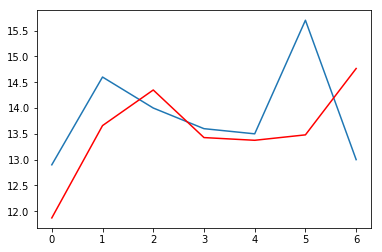

In [60]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()